In [1]:
# Importo librerías
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## consigna
Cargar los datos (Clase3v2.csv en Slack, la última columna es el target)  con objeto de clase Data (implementada por ustedes) con un método que cumpla esa función al pasarle la ruta. Hacer un split de los datos en train/test (usar 80/20)

Tratar los nans con al menos dos de las técnicas vistas en clase. (pasarían a tener dos datasets para comparar en lo que sigue)

Utilizar PCA para quedarse con las 3 CP.  (de cada uno del punto 2, idealmente usen su implementación, pero pueden usar las librerías)

Crear una clase métrica base y una clase MSE que herede es ella. (esto viene de ejercicios anteriores)

Crear una clase modelo base y clase regresión lineal que herede de ella.  (esto viene de ejercicios anteirores)

Entrenar la regresión lineal sobre train. Calcular MSE sobre validation. (para todas las variantes que hayan hecho en 2) y comparar.

 


In [2]:
# Importamos la clase Data

import csv
class Data(object):

    def __init__(self, path):
        self.dataset = self._build_dataset(path)

    @staticmethod
    def _build_dataset(path):
        datos = pd.read_csv(path, sep = ';')
        # Agregamos el nombre de las columnas
        headers =  ['X0','X1', 'X2', 'X3', 'X4', 'X5', 'Y']
        datos.columns=headers
        return datos

    def split(self, percentage):  # 0.8
        X = self.dataset[['X0','X1', 'X2', 'X3', 'X4', 'X5']]
        y = self.dataset['Y']

  
        permuted_idxs = np.random.permutation(X.shape[0])

        train_idxs = permuted_idxs[0:int(percentage * X.shape[0])]

        test_idxs = permuted_idxs[int(percentage * X.shape[0]): X.shape[0]]
  
        X_train = X.values[train_idxs]
        X_test = X.values[test_idxs]

        y_train = y.values[train_idxs]
        y_test = y.values[test_idxs]

        return X_train, X_test, y_train, y_test

In [3]:
# Cargamos nuestro dataset
data = Data('clase3v2.csv')
dataset = data._build_dataset('clase3v2.csv')
dataset.head()

,X0,X1,X2,X3,X4,X5,Y
0,13.505001,4.482330,NaN,0.770769,NaN,-3.706287,32.866898
1,-5.736774,-1.030994,NaN,0.907981,NaN,5.332656,-20.922094
2,-0.019325,1.909841,NaN,0.137427,NaN,3.400036,1.433380
3,6.079670,1.528345,NaN,0.746475,NaN,-11.486688,11.867943
4,-6.563463,0.476897,NaN,-0.576820,NaN,-5.003375,-37.913852


In [4]:
# Dividimos el dataset en train y test
X_train, X_test, y_train, y_test = data.split(.8)
print('X_train: ', X_train.shape, '\n y_train: ', y_train.shape, '\n X_test: ', X_test.shape, '\n y_test: ', y_test.shape)

X_train:  (79, 6) 
 y_train:  (79,) 
 X_test:  (20, 6) 
 y_test:  (20,)


### IMPUTACION DE NANS

In [5]:
def gen_df(x, y):
    dataf = pd.DataFrame({'X0':x[:,0],'X1':x[:,1],'X2':x[:,2],'X3':x[:,3],'X4':x[:,4],'X5':x[:,5],'Y': y})
    return dataf

In [6]:
# Se imputa utilizando la mediana:
train_df_median = gen_df(X_train, y_train)
test_df_median = gen_df(X_test, y_test)
for column in train_df_median.columns:
    train_df_median.loc[train_df_median[column].isna(), column] = train_df_median[column].mean()
for column in test_df_median.columns:
    test_df_median.loc[test_df_median[column].isna(), column] = test_df_median[column].mean()


In [7]:
# Se imputa utilizando el valor medio:
train_df_mean = gen_df(X_train, y_train)
test_df_mean = gen_df(X_test, y_test)
for column in train_df_mean.columns:
    train_df_mean.loc[train_df_mean[column].isna(), column] = train_df_mean[column].mean()
for column in test_df_mean.columns:
    test_df_mean.loc[test_df_mean[column].isna(), column] = test_df_mean[column].mean()

In [58]:
# Se resuelve la faltante de datos con la técnia de eliminar las filas con datos vacíos
train_df_drop = gen_df(X_train, y_train)
test_df_drop = gen_df(X_test, y_test)
train_df_drop = train_df_drop.dropna()
test_df_drop = test_df_drop.dropna()
print('quedan los dataset con los siguientes tamaños: Train: {}, Test: {}'.format(len(train_df_drop['X0']), len(test_df_drop['X0'])))

quedan los dataset con los siguientes tamaños: Train: 59, Test: 16


### PCA

In [8]:
from sklearn.decomposition import PCA

In [9]:
features = ['X0','X1','X2','X3','X4','X5']

In [10]:
pca_mean = PCA(n_components=3)
pca_mean_features = pca_mean.fit(train_df_mean[features])
pca_median= PCA(n_components=3)
pca_median_features = pca_median.fit(train_df_median[features])

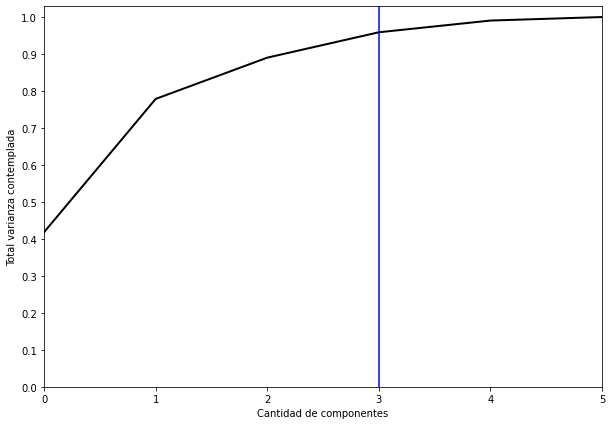

In [11]:
# Varianza explicada para features completados con la meadiana
pca_for_graph = PCA(n_components=.999999, random_state=8).fit(train_df_median[features])
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_for_graph.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 5)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(3, c='b')
#plt.axhline(0.9, c='r')
plt.show();

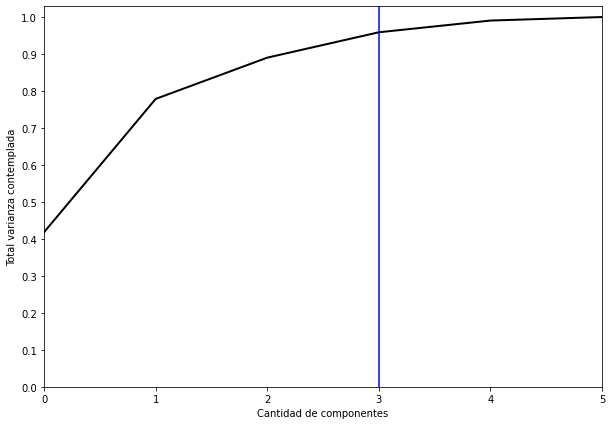

In [12]:
# Varianza explicada para features completados con la meadina
pca_for_graph = PCA(n_components=.999999, random_state=8).fit(train_df_mean[features])
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_for_graph.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 5)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(3, c='b')
#plt.axhline(0.95, c='r')
plt.show();

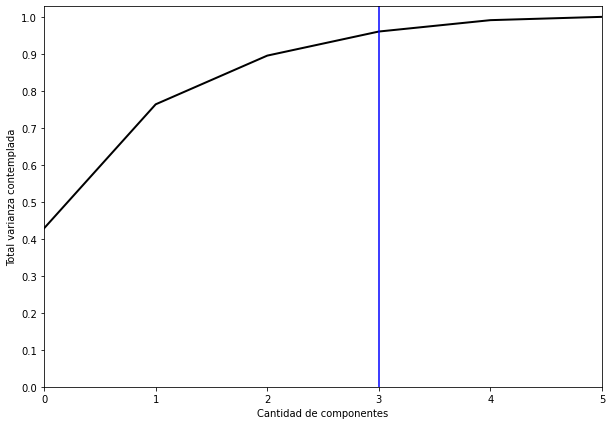

In [59]:
# Varianza explicada para features con filas reducidas por eliminación de Nans
pca_for_graph = PCA(n_components=.999999, random_state=8).fit(train_df_drop[features])
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_for_graph.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 5)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(3, c='b')
#plt.axhline(0.95, c='r')
plt.show();

## Creamos la clase MSE

In [13]:
class Metric(object):
    def __call__(self, target, prediction):
        return NotImplemented


class MSE(Metric):
    def __init__(self):
        Metric.__init__(self)

    def __call__(self, target, prediction):
        n = target.size
        return np.sum((target - prediction) ** 2) / n

## Creamos la clase de regresión lineal

In [38]:
class BaseModel(object):

    def __init__(self):
        self.model = None

    def fit(self, X, Y):
        return NotImplemented

    def predict(self, X):
        return NotImplemented

class LinearRegression(BaseModel):

    def fit(self, X, y):
        if len(X.shape) == 1:
            W = X.T.dot(y) / X.T.dot(X)
        else:
            W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.model = W

    def predict(self, X):
        return self.model, X @ self.model.reshape(-1,1)
    


## Implementamos la regresión sobre el dataset de Media 

In [39]:
lr_mean = LinearRegression()
lr_mean.fit(train_df_mean[features], train_df_mean['Y'])
model, lr_y_hat = lr_mean.predict(test_df_mean[features])

In [54]:
# Vemos la métrica MSE
mse_mean = MSE()
error_mean = mse_mean(test_df_mean['Y'],lr_y_hat[:][0] )
print('el error cuadrático medio, utilizando regresión lineal, habiendo completado los NANs con la Media, es: ', error_mean)

el error cuadrático medio, utilizando regresión lineal, habiendo completado los NANs con la Media, es:  175.8664603024301


## Implementamos la regresión sobre el dataset de Mediana

In [55]:
lr_median = LinearRegression()
lr_median.fit(train_df_median[features], train_df_median['Y'])
model_m, lr_y_hat_m = lr_median.predict(test_df_median[features])

In [56]:
# Vemos la métrica MSE
mse_median = MSE()
error_median = mse_median(test_df_median['Y'],lr_y_hat_m[:][0] )
print('el error cuadrático medio, utilizando regresión lineal, habiendo completado los NANs con la Mediana, es: ', error_median)

el error cuadrático medio, utilizando regresión lineal, habiendo completado los NANs con la Mediana, es:  175.8664603024301


## Implementamos la regresión sobre el dataset reducido por dropeo de nans


In [61]:
lr_drop = LinearRegression()
lr_drop.fit(train_df_drop[features], train_df_drop['Y'])
model_d, lr_y_hat_d = lr_drop.predict(test_df_drop[features])

In [62]:
# Vemos la métrica MSE
mse_drop = MSE()
error_drop = mse_drop(test_df_drop['Y'],lr_y_hat_m[:][0] )
print('el error cuadrático medio, utilizando regresión lineal, habiendo eliminado filas con datos vacíos, es: ', error_drop)

el error cuadrático medio, utilizando regresión lineal, habiendo eliminado filas con datos vacíos, es:  148.78677176836007
